# Курс Data Science
## 15.5 Выбор количества кластеров $k$ в алгоритме *k-means*


Существенный недостаток алгоритма заключается в необходимости до начала эксперимента выбирать количество кластеров. В этом уроке мы научимся выбирать количество кластеров $K$ автоматически.

Мы будем подходить к выбору оптимального количества кластеров, как к задаче оптимизации - выберем метрику качества кластеризации, которая зависит от параметра $K$ найдём как-нибудь, при каком значении $K$ у нас самая лучшая кластеризация. Хорошей метрикой качества является т.н. внутрикластерное расстояние.

Для подбора вводится метрика качества кластеризации с центроидами $\mu_k: \forall k=1,\ldots,K$, которая измеряет внутрикластерное расстояние - насколько хорошо центр, который мы выбрали, совпадает с "идеальным" центром кластера
$$
J(C) = \sum_{k=1}^{K}\sum_{j \in C_k} \mid x_j - \mu_k \mid \rightarrow min
$$


В этой формуле
* $\mu_k$ - координаты центроида кластера под номером $k$, количество кластеров $k$
* $x_j$ - объект под номером $j$, принадлежащий кластеру под номером $k$
* $\mid x_j - \mu_k \mid$ - евклидово расстояние (см. первый урок) от примера $x_j$ до центроида $\mu_k$

Очевидно, что эта метрика достигает оптимума в точке, где количество соответствует количеству элементов в выборке. Однако, это вырожденный случай - на практике применяют эвристику "метод локтя", которая предполагает выбор точки, в которой резко снижается динамика изменения $J(C)$:
$$
D(K) =\frac{\mid J(C_{k+1}) - J(C_{k}) \mid}{\mid J(C_{k}) - J(C_{k-1}) \mid} \rightarrow \min
$$


Пример на картинке:

![elbow_method](https://248006.selcdn.ru/public/DS.%20Block%202.%20M7/elbow_method.png)

Реализуем алгоритм поиска наилучшего количества кластеров на примере датасета с двумя классами из второго урока

In [3]:
import warnings
warnings.filterwarnings('ignore')

import pickle
import numpy as np

# данные получены с помощью функции make_classification 
with open('data/clustering.pkl', 'rb') as f:
    data_clustering = pickle.load(f)

X = np.array(data_clustering['X'])
Y = np.array(data_clustering['Y'])

In [5]:
from scipy.spatial.distance import euclidean
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.cluster import KMeans

metrics = []
MAX_CLUSTERS = 7
for cluster_num in range(1, MAX_CLUSTERS):
    kmeans_model = KMeans(n_clusters=cluster_num, random_state=99).fit(X)
    centroids, labels = kmeans_model.cluster_centers_, kmeans_model.labels_
    metric = 0
    for centroid_label in range(cluster_num):
        metric += euclidean_distances(
            X[labels==centroid_label],
            centroids[centroid_label,:].reshape(1,-1)
        ).sum(axis=0)[0]
    print(f"cluster_num {cluster_num}, metric {metric}")
    metrics.append(metric)

cluster_num 1, metric 135.92762259869988
cluster_num 2, metric 92.34245055263457
cluster_num 3, metric 74.52323397050206
cluster_num 4, metric 60.75176580321338
cluster_num 5, metric 54.86662031054898
cluster_num 6, metric 49.745770433790256


Визуализируем зависимость метрики от количества кластеров на графике

best cluster num: 2


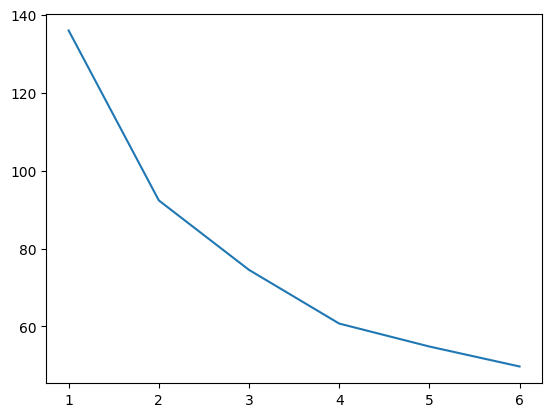

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

D = []
for i in range(0, len(metrics)-1):
    d = abs(metrics[i+1]-metrics[i])/abs(metrics[i]-metrics[i-1])
    D.append(d)
print(f"best cluster num: {np.argmin(D)+1}")

plt.plot([i+1 for i in range(len(metrics))], metrics)
plt.show()

Визуально заметно, что в точке $k=2$ в графике наблюдается перегиб - это и есть тот самый "локоть". Значит, оптимальное количество кластеров для нашего датасета $k=2$, что и так было понятно по картинке из первого урока

В третьем уроке мы научились кластеризовать данные на произвольное количество кластеров и выбирать лучшее возможное количество кластеров - это важно, потому что в отличие от задачи классификации, которую вы изучили в Модуле 5, для нашей задачи кластеризации количество кластеров заранее неизвестно.

В следующем уроке мы напишем собственную реализацию алгоритма на языке python.